## Ejemplo 4: NLP y Visualizaciones

### 1. Objetivos:
    - Aprender qué visualizaciones podemos realizar de nuestros procesamientos de lenguaje natural
 
---
    
### 2. Desarrollo:

Como ya bien sabes, las visualizaciones son una parte esencial de nuestros análisis. Vamos a aprender cómo realizar algunas visualizaciones de los análisis estadísticos que ya hemos realizado. Esto nos ayudará a presentar nuestros hallazgos de manera más efectiva.

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df = pd.read_json('https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/new_york_times_bestsellers-clean.json')

df.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


In [12]:
df['rank.numberInt'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14,  1, 11, 15, 16])

In [13]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
grouped_by_title = df.groupby('title')['description'].max()
grouped_by_title = grouped_by_title.str.lower()
grouped_by_title = grouped_by_title.str.strip()
grouped_by_title = grouped_by_title.str.replace('[^\w\s]', '')
grouped_by_title = grouped_by_title.str.replace('\d', '')
grouped_by_title = grouped_by_title.str.replace('\\n', '')
grouped_by_title = grouped_by_title.dropna()

tokenized = grouped_by_title.apply(nltk.word_tokenize)
all_words = tokenized.sum()

english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist = nltk.FreqDist(all_words_except_stop_words)

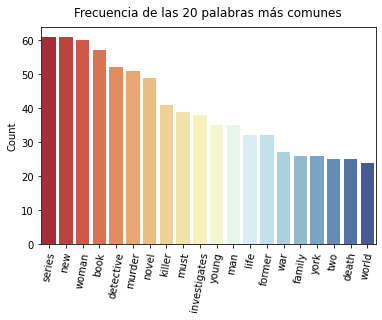

In [15]:
# Podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure()
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0],y=most_common_20[:, 1].astype('int'), ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

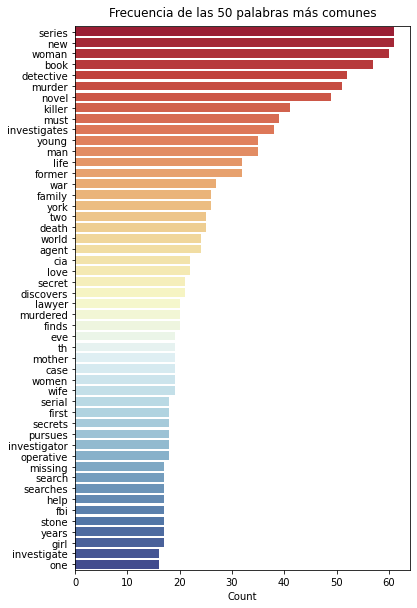

In [16]:
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist.most_common(50))))

fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot()

sns.barplot(x=most_common_50[:, 1].astype('int'), y=most_common_50[:, 0], ax=ax, palette='RdYlBu', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [17]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('detective', 'lindsay'): 4,
          ('lindsay', 'boxer'): 4,
          ('boxer', 'and'): 3,
          ('and', 'the'): 30,
          ('the', 'womens'): 3,
          ('womens', 'murder'): 3,
          ('murder', 'club'): 3,
          ('club', 'race'): 1,
          ('race', 'to'): 2,
          ('to', 'find'): 5,
          ('find', 'a'): 3,
          ('a', 'missing'): 9,
          ('missing', 'baby'): 1,
          ('baby', 'detective'): 1,
          ('club', 'investigate'): 2,
          ('investigate', 'a'): 4,
          ('a', 'possible'): 3,
          ('possible', 'serial'): 1,
          ('serial', 'killer'): 18,
          ('killer', 'puppies'): 1,
          ('puppies', 'and'): 1,
          ('and', 'an'): 9,
          ('an', 'exhusband'): 1,
          ('exhusband', 'loom'): 1,
          ('loom', 'large'): 1,
          ('large', 'in'): 1,
          ('in', 'the'): 99,
          ('the', 'last'): 1,
          ('last', 'installment'): 1,
          ('installment', 'of'): 2,
       

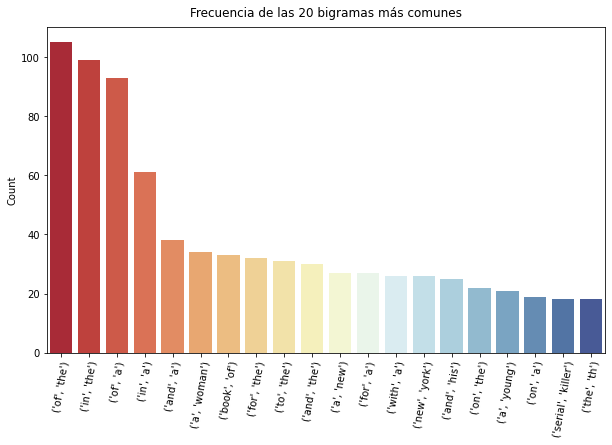

In [18]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [19]:
# Probemos sin palabras vacías

text = nltk.Text(all_words_except_stop_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('detective', 'lindsay'): 4,
          ('lindsay', 'boxer'): 4,
          ('boxer', 'womens'): 3,
          ('womens', 'murder'): 3,
          ('murder', 'club'): 3,
          ('club', 'race'): 1,
          ('race', 'find'): 1,
          ('find', 'missing'): 1,
          ('missing', 'baby'): 1,
          ('baby', 'detective'): 1,
          ('club', 'investigate'): 2,
          ('investigate', 'possible'): 2,
          ('possible', 'serial'): 1,
          ('serial', 'killer'): 18,
          ('killer', 'puppies'): 1,
          ('puppies', 'exhusband'): 1,
          ('exhusband', 'loom'): 1,
          ('loom', 'large'): 1,
          ('large', 'last'): 1,
          ('last', 'installment'): 1,
          ('installment', 'cedar'): 1,
          ('cedar', 'cove'): 2,
          ('cove', 'series'): 1,
          ('series', 'fourth'): 1,
          ('fourth', 'book'): 3,
          ('book', 'grail'): 1,
          ('grail', 'quest'): 1,
          ('quest', 'series'): 1,
          ('series', 

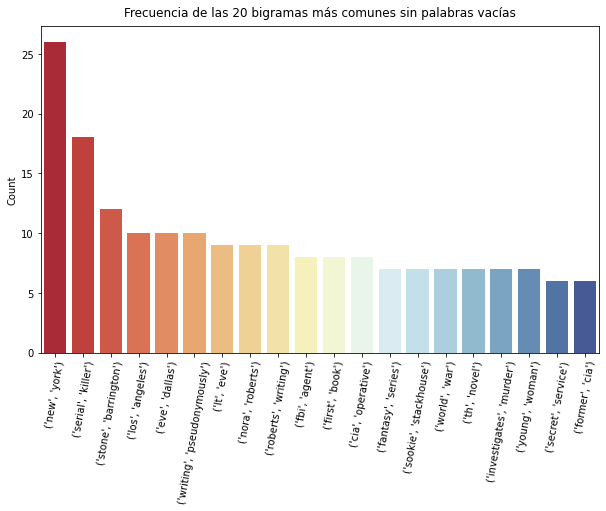

In [20]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [21]:
# No estamos restringidos solamente a bigramas

from nltk.util import ngrams

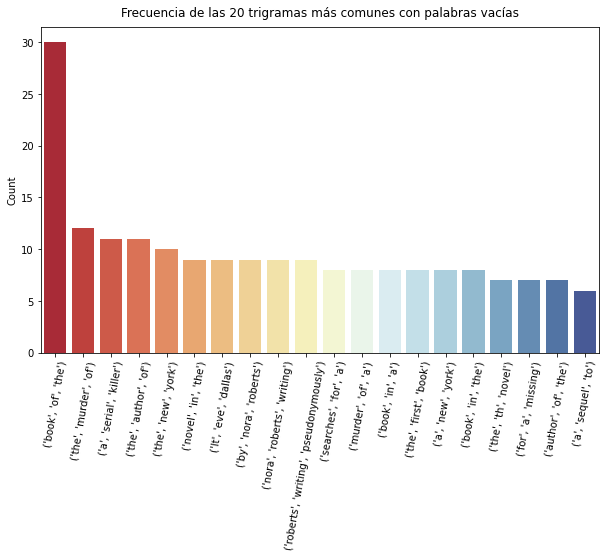

In [22]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

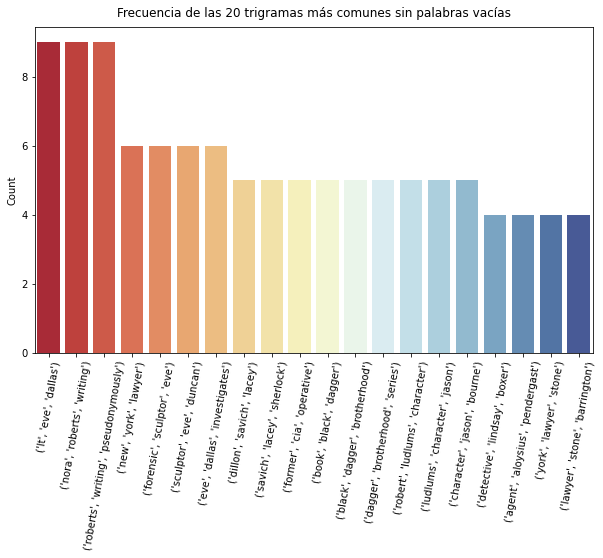

In [23]:
text = nltk.Text(all_words_except_stop_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 3)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))),dtype=object)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x=most_common_20[:, 0], y=most_common_20[:, 1], ax=ax, palette='RdYlBu');
ax.set_title('Frecuencia de las 20 trigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [24]:
# También podemos generar histogramas para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

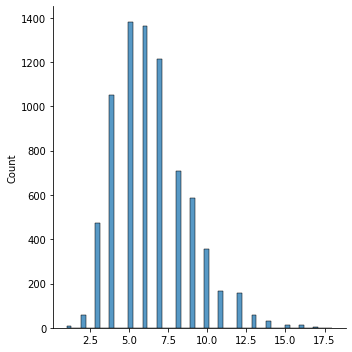

In [25]:
sns.displot(word_lengths, kde=False);

In [26]:
sentence_lengths = grouped_by_title.apply(lambda x: len(x))

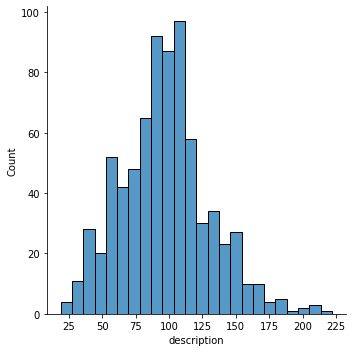

In [27]:
sns.displot(sentence_lengths, kde=False);

In [28]:
num_of_words = grouped_by_title.str.split(' ').str.len()

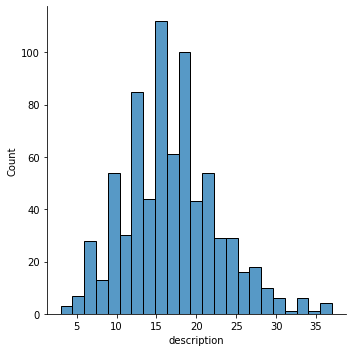

In [29]:
sns.displot(num_of_words, kde=False);

Para terminar, vamos a hacer una nube de palabras utilizando la librería `wordcloud`.

In [30]:
from wordcloud import WordCloud

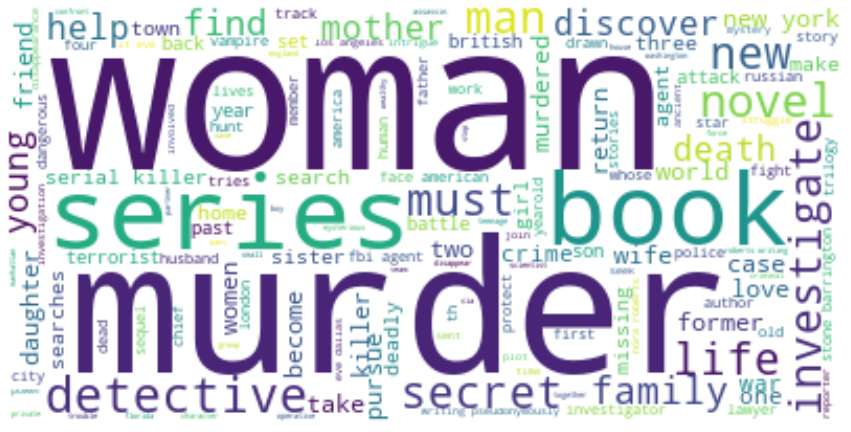

In [31]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(' '.join(all_words_except_stop_words))

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()